In [3]:
import bs4
from bs4 import BeautifulSoup
import requests
import json
import re
import html
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Web Scraping

In [4]:
def getGameList(genreString, numPages):
    games_list = []
    for i in range(1,numPages+1):
        source = requests.get('https://boardgamegeek.com/'+genreString+'/browse/boardgame/page/' + str(i))
        soup = BeautifulSoup(source.text, 'lxml')
        symbolslist = soup.find('table').tr.next_siblings
        for sec in symbolslist:
            if type(sec) is not bs4.element.NavigableString:
                temp = sec.find('td', class_='collection_thumbnail').a.attrs['href']
                games_list.append(temp)
    return games_list

In [19]:
source = requests.get('https://boardgamegeek.com/thematic/browse/boardgame/page/1')
soup = BeautifulSoup(source.text, 'lxml')
symbolslist = soup.find('table').tr.next_siblings
for sec in symbolslist:
    if type(sec) is not bs4.element.NavigableString:
        temp = sec.find('td', class_='collection_thumbnail').a.attrs['href']

In [5]:
#cgs_list = getGameList("cgs",10)       
#print("CGS:", len(cgs_list))

#party_list = getGameList("partygames",10)       
#print("Party:", len(party_list))

thematic_list = getGameList("thematic",50)       
print("Thematic:", len(thematic_list))

child_list = getGameList("childrensgames",50)       
print("Child:", len(child_list))

fam_list = getGameList("familygames",50)       
print("Family:", len(fam_list))

strat_list = getGameList("strategygames",50)       
print("Strategy:", len(strat_list))

war_list = getGameList("wargames",50)       
print("War:", len(war_list))

abs_list = getGameList("abstracts",50)       
print("Abstract:", len(abs_list))

Thematic: 1565
Child: 4038
Family: 2608
Strategy: 2840
War: 5000
Abstract: 4669


In [239]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def getGameDF(gamesList):
    df = pd.DataFrame(columns = ["name",
                   "description", "types", "categories"])
    for el in gamesList:
        newSource = requests.get('https://www.boardgamegeek.com/xmlapi/boardgame/' + el.split('/')[2] + '?stats=1')
        print(el)
        soup = BeautifulSoup(newSource.text, 'html.parser')

        # Game name
        for names in soup.find_all('name'):
            if names.get('primary') == 'true':
                name = names.encode_contents().decode("utf-8")

        # Description
        description = cleanhtml(html.unescape(soup.find('description').encode_contents().decode("utf-8")))

        # Game Types
        types = [domain.encode_contents().decode("utf-8").split(" ")[0] for domain in soup.find_all('boardgamesubdomain')]

        # Game Categories
        categories = [cat.encode_contents().decode("utf-8").split(" ")[0] for cat in soup.find_all('boardgamecategory')]


        df.loc[len(df)] = [name,
                           description,
                           types,
                           categories
                           ]
        
    return df

In [224]:
newSource = requests.get('https://www.boardgamegeek.com/xmlapi/boardgame/174430?stats=1')
soup = BeautifulSoup(newSource.text, 'html.parser')

In [225]:
for names in soup.find_all('name'):
    if names.get('primary') == 'true':
        print(names.encode_contents().decode("utf-8"))

Gloomhaven


In [226]:
cleanhtml(html.unescape(soup.find('description').encode_contents().decode("utf-8")))

'Gloomhaven  is a game of Euro-inspired tactical combat in a persistent world of shifting motives. Players will take on the role of a wandering adventurer with their own special set of skills and their own reasons for traveling to this dark corner of the world. Players must work together out of necessity to clear out menacing dungeons and forgotten ruins. In the process, they will enhance their abilities with experience and loot, discover new locations to explore and plunder, and expand an ever-branching story fueled by the decisions they make.This is a game with a persistent and changing world that is ideally played over many game sessions. After a scenario, players will make decisions on what to do, which will determine how the story continues, kind of like a Choose Your Own Adventure book. Playing through a scenario is a cooperative affair where players will fight against automated monsters using an innovative card system to determine the order of play and what a player does on thei

In [228]:
for domain in soup.find_all('boardgamesubdomain'):
    print(domain.encode_contents().decode("utf-8").split(" ")[0])

Strategy
Thematic


In [ ]:
for domain in soup.find_all('boardgamecategory'):
    print(domain.encode_contents().decode("utf-8"))

In [240]:
theme_df = getGameDF(thematic_list)
print("Thematic:", len(theme_df))
child_df = getGameDF(child_list)
print("Children's:", len(child_df))
fam_df = getGameDF(fam_list)
print("Family:", len(fam_df))
strat_df = getGameDF(strat_list)
print("Strategy:", len(strat_df))
war_df = getGameDF(war_list)
print("War:", len(war_df))
abs_df = getGameDF(abs_list)
print("Abstract:", len(abs_df))

/boardgame/174430/gloomhaven
/boardgame/161936/pandemic-legacy-season-1
/boardgame/291457/gloomhaven-jaws-lion
/boardgame/233078/twilight-imperium-fourth-edition
/boardgame/187645/star-wars-rebellion
/boardgame/115746/war-ring-second-edition
/boardgame/266507/clank-legacy-acquisitions-incorporated
/boardgame/167355/nemesis
/boardgame/192135/too-many-bones
/boardgame/205637/arkham-horror-card-game
/boardgame/55690/kingdom-death-monster
/boardgame/316554/dune-imperium
/boardgame/221107/pandemic-legacy-season-2
/boardgame/314040/pandemic-legacy-season-0
/boardgame/96848/mage-knight-board-game
/boardgame/205059/mansions-madness-second-edition
/boardgame/180263/7th-continent
/boardgame/209010/mechs-vs-minions
/boardgame/264220/tainted-grail-fall-avalon
/boardgame/164153/star-wars-imperial-assault
/boardgame/235802/too-many-bones-undertow
/boardgame/253344/cthulhu-death-may-die
/boardgame/121921/robinson-crusoe-adventures-cursed-island
/boardgame/269385/lord-rings-journeys-middle-earth
/boar

In [241]:
df = pd.concat([theme_df,child_df,fam_df,strat_df,war_df,abs_df])
df = df.drop_duplicates(subset=['name'])
df.reset_index(drop=True, inplace=True)
df

,name,description,types,categories
0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
1,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,"[Strategy, Thematic]","[Environmental, Medical]"
2,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
3,Twilight Imperium: Fourth Edition,Twilight Imperium (Fourth Edition) is a game o...,"[Strategy, Thematic]","[Civilization, Economic, Exploration, Negotiat..."
4,Star Wars: Rebellion,Star Wars: Rebellion is a board game of epic c...,[Thematic],"[Civil, Fighting, Miniatures, Movies, Science,..."
...,...,...,...,...
18727,Knights Poker,Knights Poker is the new board game from the w...,[Abstract],[Abstract]
18728,Gekitai,Gekitai (Repel or Push Away) is a 3-in-a-row g...,[Abstract],"[Abstract, Print]"
18729,Gekitai²,Gekitai (Repel or Push Away) is a 3-in-a-row ...,[Abstract],"[Abstract, Print]"
18730,Digit Draughts,Digit Draughts is a set of three related games...,[Abstract],"[Abstract, Number]"


In [242]:
pd.to_pickle(df, 'BGGDataGenre.pkl')

# Data Cleaning

In [243]:
df = pd.read_pickle('BGGDataGenre.pkl')

In [244]:
all_genres = sum(df['types'],[])
len(set(all_genres))

8

In [245]:
set(all_genres)

{'Abstract',
 "Children's",
 'Customizable',
 'Family',
 'Party',
 'Strategy',
 'Thematic',
 'Wargames'}

In [246]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

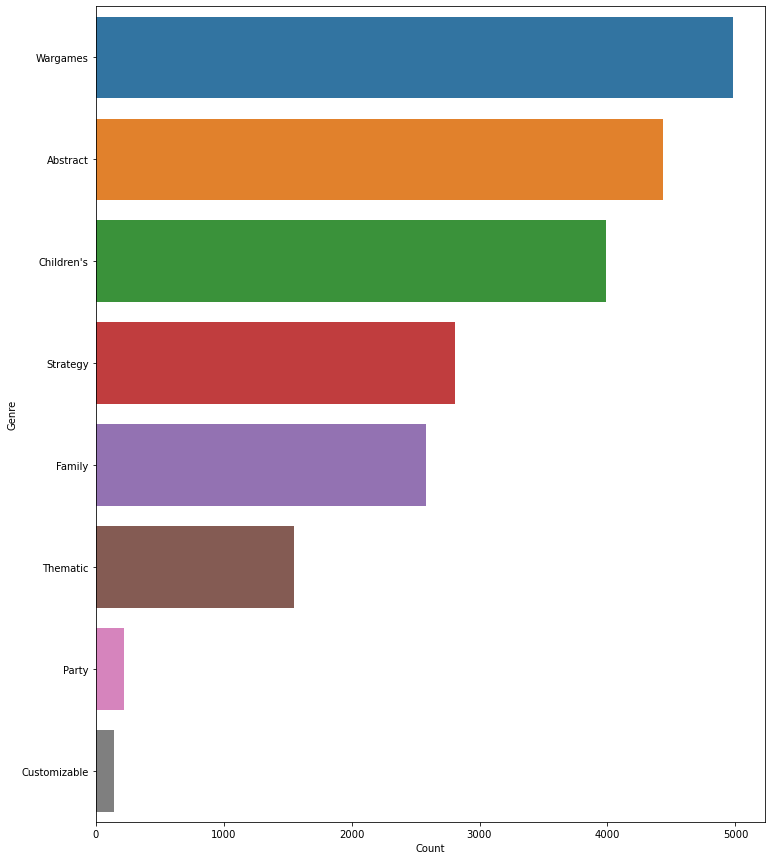

In [247]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
plt.show()

In [248]:
def clean_df(dataframe):
    approvedGenres = ['Abstract',"Children's",'Family','Strategy','Thematic','War']
    i = 0
    while i < len(dataframe) - 1:
        i += 1
        for genre in dataframe.iloc[i]['types']:
            if genre not in approvedGenres:
                #name = dataframe.iloc[i]['name']
                dataframe = dataframe.drop(i,axis=0)
                dataframe.reset_index(drop=True, inplace=True)
                i -= 1
                #print(i, len(dataframe), name)
    return dataframe

In [249]:
df = clean_df(df)
df.reset_index(drop=True, inplace=True)
df

,name,description,types,categories
0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
1,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,"[Strategy, Thematic]","[Environmental, Medical]"
2,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
3,Twilight Imperium: Fourth Edition,Twilight Imperium (Fourth Edition) is a game o...,"[Strategy, Thematic]","[Civilization, Economic, Exploration, Negotiat..."
4,Star Wars: Rebellion,Star Wars: Rebellion is a board game of epic c...,[Thematic],"[Civil, Fighting, Miniatures, Movies, Science,..."
...,...,...,...,...
13375,Knights Poker,Knights Poker is the new board game from the w...,[Abstract],[Abstract]
13376,Gekitai,Gekitai (Repel or Push Away) is a 3-in-a-row g...,[Abstract],"[Abstract, Print]"
13377,Gekitai²,Gekitai (Repel or Push Away) is a 3-in-a-row ...,[Abstract],"[Abstract, Print]"
13378,Digit Draughts,Digit Draughts is a set of three related games...,[Abstract],"[Abstract, Number]"


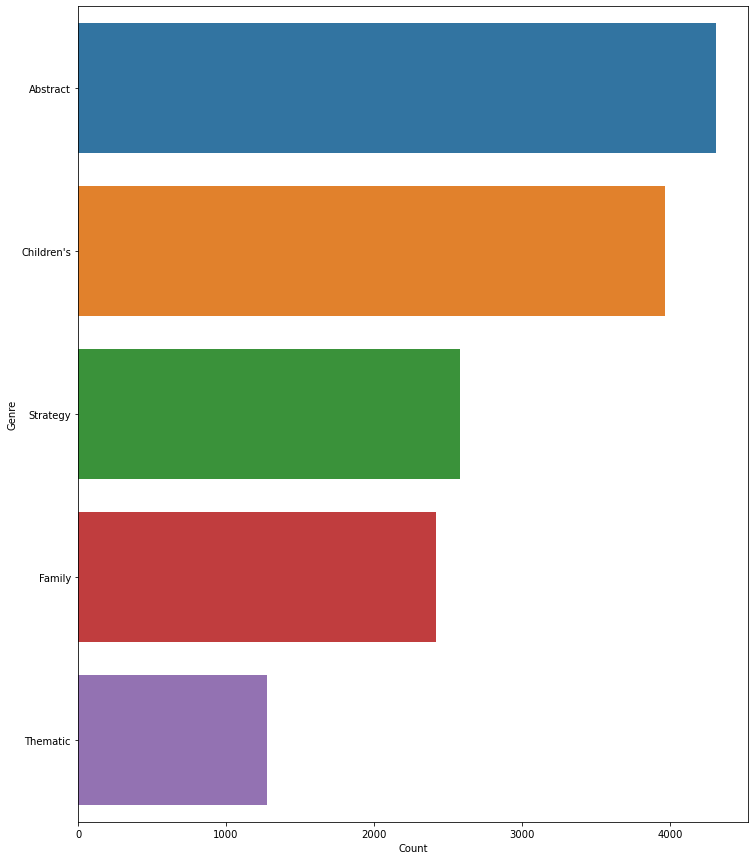

In [250]:
all_genres = sum(df['types'],[])
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
plt.show()

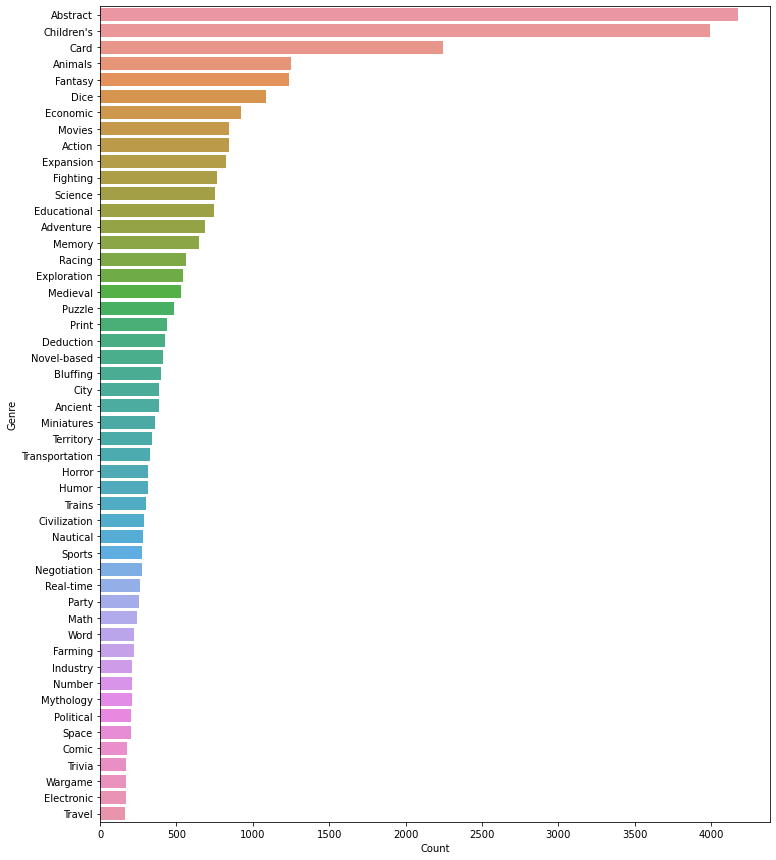

In [264]:
all_cats = sum(df['categories'],[])
all_cats = nltk.FreqDist(all_cats)

# create dataframe
all_cats_df = pd.DataFrame({'Genre': list(all_cats.keys()),
                              'Count': list(all_cats.values())})
g = all_cats_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
plt.show()

In [251]:
df.loc[0]['description']

'Gloomhaven  is a game of Euro-inspired tactical combat in a persistent world of shifting motives. Players will take on the role of a wandering adventurer with their own special set of skills and their own reasons for traveling to this dark corner of the world. Players must work together out of necessity to clear out menacing dungeons and forgotten ruins. In the process, they will enhance their abilities with experience and loot, discover new locations to explore and plunder, and expand an ever-branching story fueled by the decisions they make.This is a game with a persistent and changing world that is ideally played over many game sessions. After a scenario, players will make decisions on what to do, which will determine how the story continues, kind of like a Choose Your Own Adventure book. Playing through a scenario is a cooperative affair where players will fight against automated monsters using an innovative card system to determine the order of play and what a player does on thei

In [255]:
def clean_desc(raw_html):
    clean = re.sub("[^a-zA-Z]"," ",raw_html)
    clean = ' '.join(clean.split())
    clean = clean.lower()
    return clean

In [256]:
clean_desc(df.loc[0]['description'])

'gloomhaven is a game of euro inspired tactical combat in a persistent world of shifting motives players will take on the role of a wandering adventurer with their own special set of skills and their own reasons for traveling to this dark corner of the world players must work together out of necessity to clear out menacing dungeons and forgotten ruins in the process they will enhance their abilities with experience and loot discover new locations to explore and plunder and expand an ever branching story fueled by the decisions they make this is a game with a persistent and changing world that is ideally played over many game sessions after a scenario players will make decisions on what to do which will determine how the story continues kind of like a choose your own adventure book playing through a scenario is a cooperative affair where players will fight against automated monsters using an innovative card system to determine the order of play and what a player does on their turn each 

In [257]:
df['description'] = df['description'].apply(lambda x: clean_desc(x))
df

,name,description,types,categories
0,Gloomhaven,gloomhaven is a game of euro inspired tactical...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
1,Pandemic Legacy: Season 1,pandemic legacy is a co operative campaign gam...,"[Strategy, Thematic]","[Environmental, Medical]"
2,Gloomhaven: Jaws of the Lion,gloomhaven jaws of the lion is a standalone ga...,"[Strategy, Thematic]","[Adventure, Exploration, Fantasy, Fighting, Mi..."
3,Twilight Imperium: Fourth Edition,twilight imperium fourth edition is a game of ...,"[Strategy, Thematic]","[Civilization, Economic, Exploration, Negotiat..."
4,Star Wars: Rebellion,star wars rebellion is a board game of epic co...,[Thematic],"[Civil, Fighting, Miniatures, Movies, Science,..."
...,...,...,...,...
13375,Knights Poker,knights poker is the new board game from the w...,[Abstract],[Abstract]
13376,Gekitai,gekitai repel or push away is a in a row game ...,[Abstract],"[Abstract, Print]"
13377,Gekitai²,gekitai repel or push away is a in a row game ...,[Abstract],"[Abstract, Print]"
13378,Digit Draughts,digit draughts is a set of three related games...,[Abstract],"[Abstract, Number]"


In [258]:
genreCombos = list(set([tuple(el) for el in list(df.types)]))

In [259]:
combodf = df[df['types'].apply(lambda x: x==list(list(genreCombos)[0]))]

In [260]:
comboDict = dict()
for combo in genreCombos:
    comboName = " + ".join(combo)
    combodf = df[df['types'].apply(lambda x: x==list(combo))]
    count = len(combodf)
    comboDict[comboName] = count

In [261]:
comboDict

{"Children's + Family": 114,
 'Abstract + Strategy + Thematic': 1,
 "Abstract + Children's": 72,
 'Family + Strategy + Thematic': 2,
 'Abstract + Family': 124,
 'Strategy + Thematic': 262,
 "Children's": 3778,
 'Family': 1631,
 'Abstract + Strategy': 42,
 'Family + Thematic': 129,
 'Family + Strategy': 419,
 'Abstract + Thematic': 1,
 'Abstract': 4068,
 'Thematic': 881,
 'Strategy': 1856}

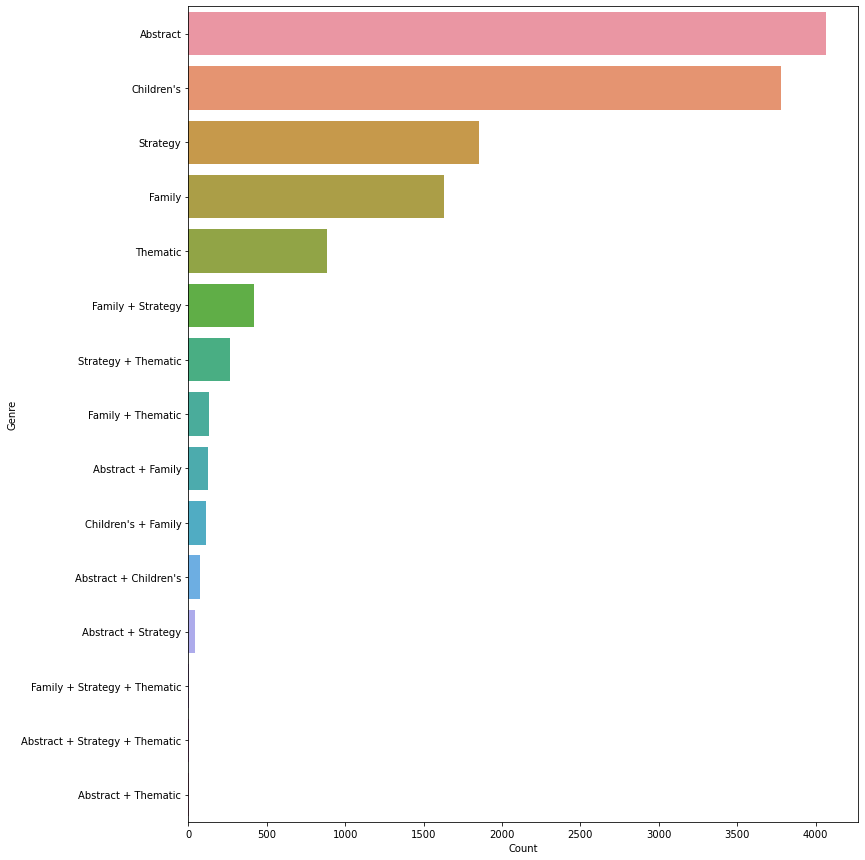

In [262]:
all_genres_df = pd.DataFrame({'Genre': list(comboDict.keys()), 
                              'Count': list(comboDict.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
plt.show()

In [59]:
all_cats = sum(df.categories,[])
len(set(all_cats)), set(all_cats)

(84,
 {'Abstract Strategy',
  'Action / Dexterity',
  'Adventure',
  'Age of Reason',
  'American Civil War',
  'American Indian Wars',
  'American Revolutionary War',
  'American West',
  'Ancient',
  'Animals',
  'Arabian',
  'Aviation / Flight',
  'Bluffing',
  'Book',
  'Card Game',
  "Children's Game",
  'City Building',
  'Civil War',
  'Civilization',
  'Collectible Components',
  'Comic Book / Strip',
  'Deduction',
  'Dice',
  'Economic',
  'Educational',
  'Electronic',
  'Environmental',
  'Expansion for Base-game',
  'Exploration',
  'Fan Expansion',
  'Fantasy',
  'Farming',
  'Fighting',
  'Game System',
  'Horror',
  'Humor',
  'Industry / Manufacturing',
  'Korean War',
  'Mafia',
  'Math',
  'Mature / Adult',
  'Maze',
  'Medical',
  'Medieval',
  'Memory',
  'Miniatures',
  'Modern Warfare',
  'Movies / TV / Radio theme',
  'Murder/Mystery',
  'Music',
  'Mythology',
  'Napoleonic',
  'Nautical',
  'Negotiation',
  'Novel-based',
  'Number',
  'Party Game',
  'Pike an

In [124]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms)
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

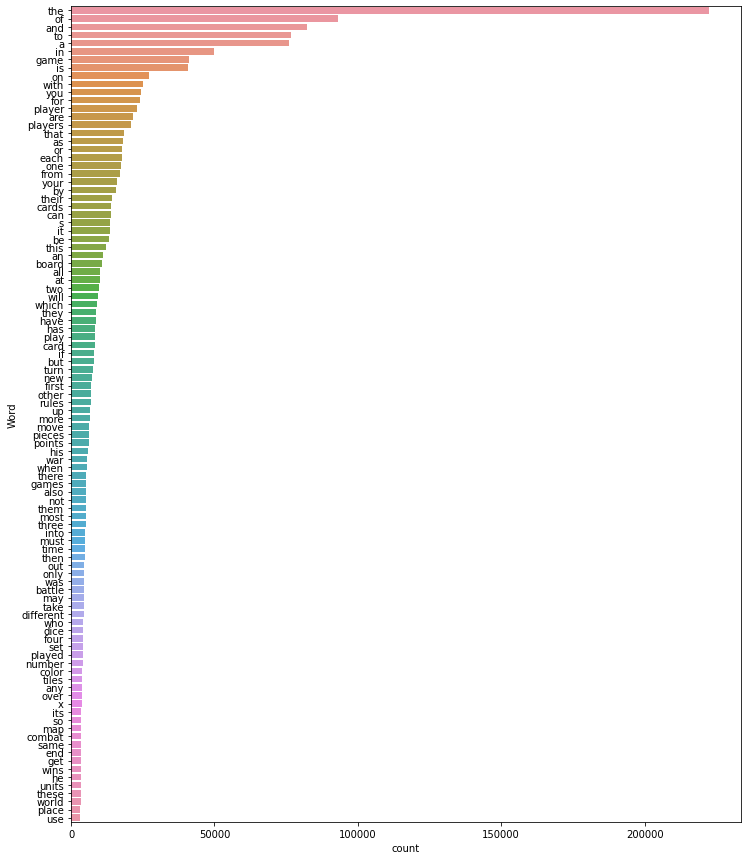

In [125]:
freq_words(df['description'], 100)

In [126]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Noah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
stop_words = set(stopwords.words('english'))

In [128]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [129]:
df['description'] = df['description'].apply(lambda x: remove_stopwords(x))

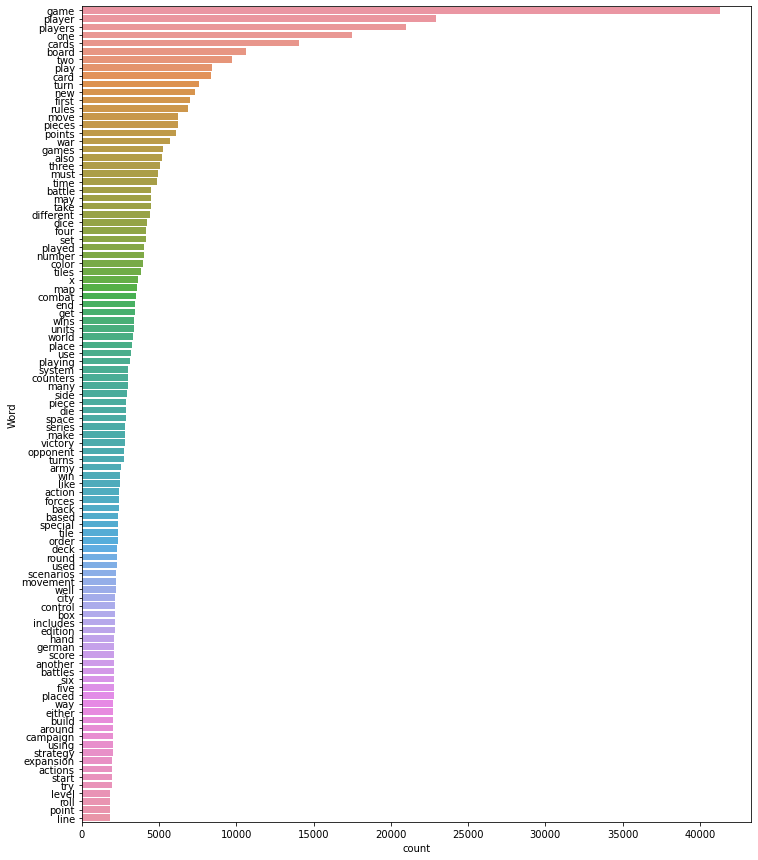

In [130]:
freq_words(df['description'], 100)

In [134]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['types'])

# transform target variable
y = multilabel_binarizer.transform(df['types'])

In [135]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [137]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df['description'], y, test_size=0.2, random_state=9)

In [138]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [291]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [140]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [141]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [142]:
y_pred = clf.predict(xval_tfidf)

In [143]:
y_pred[3]

array([0, 0, 0, 0, 0, 1])

In [144]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('War',)

In [286]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.7704725565013207

In [309]:
for i in np.arange(0,1.05,0.05):
    # predict probabilities
    y_pred_prob = clf.predict_proba(xval_tfidf)
    t = i # threshold value
    y_pred_new = (y_pred_prob >= t).astype(int)
    for i,row in enumerate(y_pred_new):
        if (row == [0,0,0,0,0,0]).all():
            row = (y_pred_prob[i] == max(y_pred_prob[i])).astype(int)
            y_pred_new[i] = row
    # evaluate performance
    
    print("{:.2f}".format(t),f1_score(yval, y_pred_new, average="micro"))

0.00 0.30594791223249873
0.05 0.5064499484004129
0.10 0.6522740848195238
0.15 0.73160518444666
0.20 0.7770195905789126
0.25 0.7980260838914345
0.30 0.8099436688709282
0.35 0.8170747018204647
0.40 0.821364681829798
0.45 0.8204266321913382
0.50 0.8202057023825022
0.55 0.8197750457755689
0.60 0.8197666797745444
0.65 0.8192676204226276
0.70 0.8185520956510313
0.75 0.8180383907441494
0.80 0.8175720110482705
0.85 0.8176795580110497
0.90 0.8175240099986844
0.95 0.8175240099986844
1.00 0.8175240099986844


In [329]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.4 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
for i,row in enumerate(y_pred_new):
        if (row == [0,0,0,0,0,0]).all():
            row = (y_pred_prob[i] == max(y_pred_prob[i])).astype(int)
            y_pred_new[i] = row
            
f1_score(yval, y_pred_new, average="micro")        

0.821364681829798

In [330]:
print(classification_report(yval, y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       887
           1       0.80      0.91      0.85       777
           2       0.70      0.51      0.59       497
           3       0.76      0.75      0.76       538
           4       0.79      0.60      0.68       273
           5       0.93      0.94      0.93       981

   micro avg       0.83      0.81      0.82      3953
   macro avg       0.81      0.76      0.78      3953
weighted avg       0.82      0.81      0.82      3953
 samples avg       0.85      0.84      0.84      3953



In [315]:
def infer_tags(q):
    q = clean_desc(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict_proba(q_vec)
    t = 0.4 # threshold value
    q_pred_new = (q_pred >= t).astype(int)
    if sum(sum(q_pred_new)) == 0:
        q_pred_new = (q_pred == max(q_pred[0])).astype(int)
    return multilabel_binarizer.inverse_transform(q_pred_new)

In [326]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Game: ", df['name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['types'][k], "\n")

Game:  Exodus: Proxima Centauri 
Predicted genre:  [('Strategy',)]
Actual genre:  ['Thematic', 'Strategy'] 

Game:  Hell by Daylight 
Predicted genre:  [('War',)]
Actual genre:  ['War'] 

Game:  Justinian 
Predicted genre:  [('Strategy',)]
Actual genre:  ['Strategy'] 

Game:  Neanderthal 
Predicted genre:  [("Children's",)]
Actual genre:  ['Thematic'] 

Game:  Toy Story Toys Away 
Predicted genre:  [("Children's",)]
Actual genre:  ["Children's"] 



In [298]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [299]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yval.argmax(axis=1), y_pred_new.argmax(axis=1))

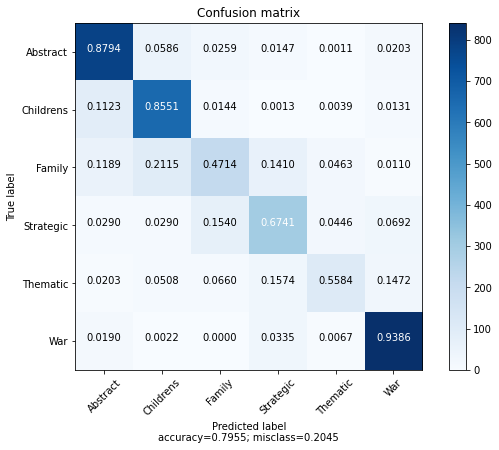

In [328]:
plot_confusion_matrix(cm, ["Abstract","Childrens","Family","Strategic","Thematic","War"], normalize=True)

# LTSM Model

In [544]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D, SpatialDropout1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [545]:
ltsm_df = df.drop(['categories','mechanics','types'],axis=1)
ltsm_df

,name,description
0,Gloomhaven,gloomhaven game euro inspired tactical combat ...
1,Pandemic Legacy: Season 1,pandemic legacy co operative campaign game ove...
2,Gloomhaven: Jaws of the Lion,gloomhaven jaws lion standalone game takes pla...
3,Twilight Imperium: Fourth Edition,twilight imperium fourth edition game galactic...
4,Star Wars: Rebellion,star wars rebellion board game epic conflict g...
...,...,...
18235,Azul: Crystal Mosaic,azul crystal mosaic contains double sided play...
18236,Knights Poker,knights poker new board game world leading boa...
18237,Gekitai,gekitai repel push away row game played x grid...
18238,Gekitai²,gekitai repel push away row game played x grid...


In [546]:
types_df = pd.DataFrame(columns=["Abstract","Children's","Family","Strategy","Thematic","War"])
types_df

,Abstract,Children's,Family,Strategy,Thematic,War


In [547]:
for i,genres in enumerate(list(df['types'])):
    newdf = pd.DataFrame([[0,0,0,0,0,0]],columns=["Abstract","Children's","Family","Strategy","Thematic","War"])
    for genre in genres:
        newdf[genre] = 1
    types_df = types_df.append(newdf, ignore_index=True)
types_df

,Abstract,Children's,Family,Strategy,Thematic,War
0,0,0,0,1,1,0
1,0,0,0,1,1,0
2,0,0,0,1,1,0
3,0,0,0,1,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
18235,1,0,0,0,0,0
18236,1,0,0,0,0,0
18237,1,0,0,0,0,0
18238,1,0,0,0,0,0


In [548]:
ltsm_df = pd.concat([ltsm_df,types_df],axis=1)
ltsm_df

,name,description,Abstract,Children's,Family,Strategy,Thematic,War
0,Gloomhaven,gloomhaven game euro inspired tactical combat ...,0,0,0,1,1,0
1,Pandemic Legacy: Season 1,pandemic legacy co operative campaign game ove...,0,0,0,1,1,0
2,Gloomhaven: Jaws of the Lion,gloomhaven jaws lion standalone game takes pla...,0,0,0,1,1,0
3,Twilight Imperium: Fourth Edition,twilight imperium fourth edition game galactic...,0,0,0,1,1,0
4,Star Wars: Rebellion,star wars rebellion board game epic conflict g...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
18235,Azul: Crystal Mosaic,azul crystal mosaic contains double sided play...,1,0,0,0,0,0
18236,Knights Poker,knights poker new board game world leading boa...,1,0,0,0,0,0
18237,Gekitai,gekitai repel push away row game played x grid...,1,0,0,0,0,0
18238,Gekitai²,gekitai repel push away row game played x grid...,1,0,0,0,0,0


In [549]:
genre_labels = ltsm_df[["Abstract","Children's","Family","Strategy","Thematic","War"]]
genre_labels.head()

,Abstract,Children's,Family,Strategy,Thematic,War
0,0,0,0,1,1,0
1,0,0,0,1,1,0
2,0,0,0,1,1,0
3,0,0,0,1,1,0
4,0,0,0,0,1,0


In [550]:
X = []
descriptions = list(ltsm_df["description"])
for desc in descriptions:
    X.append(desc)

y = genre_labels.values

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [552]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [553]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [554]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(100)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [555]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 200, 100)          5425300   
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 774       
Total params: 5,543,322
Trainable params: 118,022
Non-trainable params: 5,425,300
_________________________________________________________________
None


In [558]:
history = model.fit(np.array(X_train, dtype=np.float), np.array(y_train, dtype=np.float), batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
365/365 [==============================] - 48s 127ms/step - loss: 0.4791 - acc: 0.2669 - val_loss: 0.3407 - val_acc: 0.5118
Epoch 2/20
365/365 [==============================] - 46s 126ms/step - loss: 0.3425 - acc: 0.5039 - val_loss: 0.3188 - val_acc: 0.5560
Epoch 3/20
365/365 [==============================] - 46s 126ms/step - loss: 0.2925 - acc: 0.6274 - val_loss: 0.2610 - val_acc: 0.6841
Epoch 4/20
365/365 [==============================] - 56s 153ms/step - loss: 0.2468 - acc: 0.7001 - val_loss: 0.2308 - val_acc: 0.7211
Epoch 5/20
365/365 [==============================] - 49s 133ms/step - loss: 0.2213 - acc: 0.7296 - val_loss: 0.2293 - val_acc: 0.7321
Epoch 6/20
365/365 [==============================] - 51s 140ms/step - loss: 0.2103 - acc: 0.7515 - val_loss: 0.2006 - val_acc: 0.7592
Epoch 7/20
365/365 [==============================] - 49s 134ms/step - loss: 0.1921 - acc: 0.7741 - val_loss: 0.1974 - val_acc: 0.7694
Epoch 8/20
365/365 [==============================] - 4

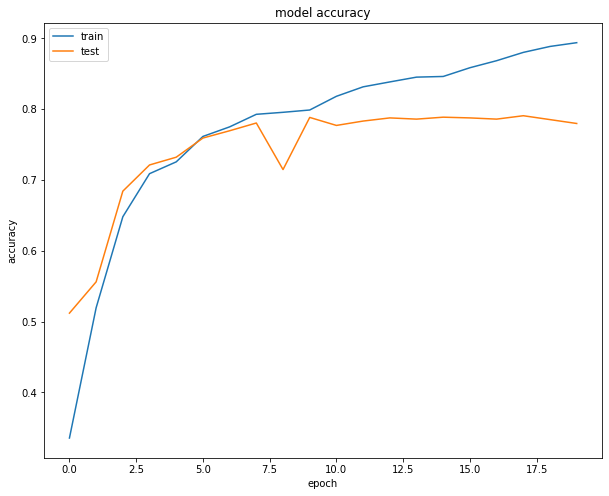

In [559]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

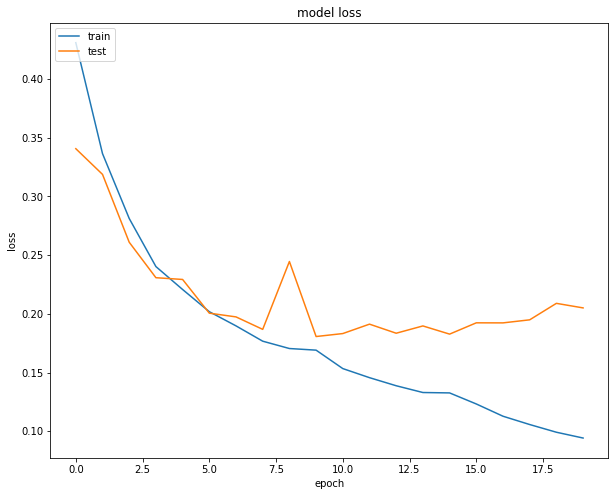

In [560]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [561]:
score = model.evaluate(np.array(X_test, dtype=np.float), np.array(y_test, dtype=np.float), verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

114/114 [==============================] - 7s 61ms/step - loss: 0.2078 - acc: 0.7774
Test Score: 0.20777413249015808
Test Accuracy: 0.7774122953414917


In [562]:
y_pred = model.predict(X_test)

In [571]:
f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1),average="micro")

0.7774122807017544

In [568]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

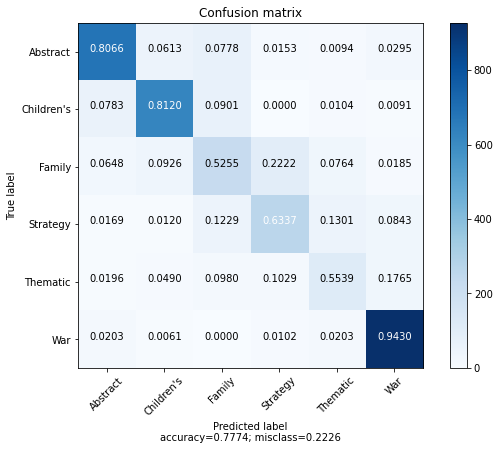

In [569]:
plot_confusion_matrix(cm,types_df.columns)

# Analysis

In [592]:
all_mechanics = [item for sublist in list(df.mechanics) for item in sublist]

In [595]:
all_mechanics = nltk.FreqDist(all_mechanics) 

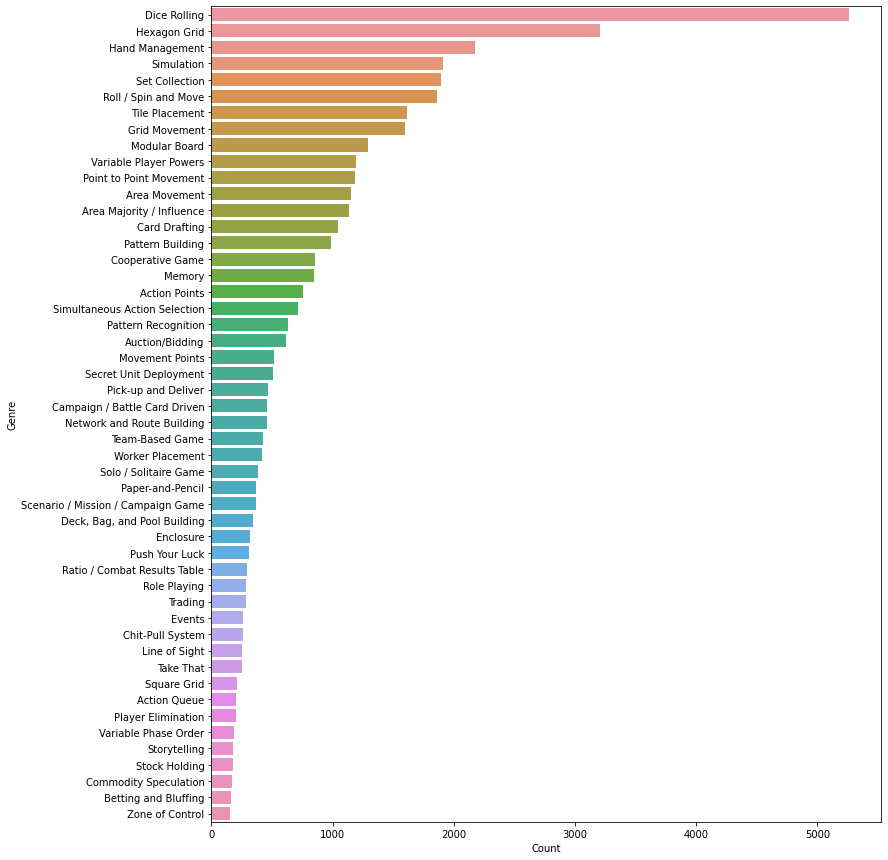

In [598]:
all_mechanics_df = pd.DataFrame({'Genre': list(all_mechanics.keys()), 
                              'Count': list(all_mechanics.values())})
g = all_mechanics_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
plt.show()

In [604]:
all_mechanics_df.sort_values(by="Count",ascending=False)

,Genre,Count
16,Dice Rolling,5262
41,Hexagon Grid,3209
7,Hand Management,2176
46,Simulation,1910
10,Set Collection,1896
...,...,...
127,Player Judge,3
142,Hot Potato,2
176,Auction: English,1
177,Auction: Dexterity,1
